In [1]:
import numpy as np
import pickle
import pandas as pd
import re
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from src.parse_assessment import parse_assessment
pd.set_option('display.max_columns', 100, 'display.max_rows', 100)

df = parse_assessment('data/Assessment.xlsx')
keyword_columns = df.columns[df.columns.str.contains('keywords') & (df.notna().sum() > 100)]

with open('datasets/raw_text_dataset.pickle', 'rb') as f:
    text_df = pickle.load(f)
text_df['full_text'] = text_df['task1_text'] + " " + text_df['task2_text'] + " " + text_df['task3_text']
df = pd.merge(df, text_df, on='email')
df = df.loc[::2]

In [ ]:
train_df = df[['мотивация keywords', 'full_text']].dropna()
train_df.rename(columns={'мотивация keywords': 'keywords', 'full_text': 'text'}, inplace=True)
train_df = train_df[train_df.text.apply(type) == str]
train_df = train_df[train_df.keywords.apply(lambda keyword: type(keyword) == str)]
train_df['text_tokens'] = train_df.text.str.split(" ")
train_df['target_tokens'] = train_df.keywords.str.split(" ")
train_df['target_tokens'] = train_df['target_tokens'].map(lambda tokens: list(map(lambda token: re.sub(r'[^\w\s]', '', token), tokens)))
train_df.reset_index(inplace=True)
train_df = train_df[train_df.text_tokens.apply(lambda tokens: len(tokens) > 200)]
train_df.reset_index(inplace=True)

In [117]:
train2_df = df[['готовность к изменениям keywords', 'full_text']].dropna()
train2_df.rename(columns={'готовность к изменениям keywords': 'keywords', 'full_text': 'text'}, inplace=True)
train2_df = train2_df[train2_df.text.apply(type) == str]
train2_df = train2_df[train2_df.keywords.apply(lambda keyword: type(keyword) == str)]
train2_df['text_tokens'] = train2_df.text.str.split(" ")
train2_df['target_tokens'] = train2_df.keywords.str.split(" ")
train2_df['target_tokens'] = train2_df['target_tokens'].map(lambda tokens: list(map(lambda token: re.sub(r'[^\w\s]', '', token), tokens)))
train2_df = train2_df[train_df2.text_tokens.apply(lambda tokens: len(tokens) > 200)]
train2_df.reset_index(inplace=True)

In [127]:
train3_df = df[['Цифровые образовательные технологии keywords', 'full_text']].dropna()
train3_df.rename(columns={'Цифровые образовательные технологии keywords': 'keywords', 'full_text': 'text'}, inplace=True)
train3_df = train3_df[train3_df.text.apply(type) == str]
train3_df = train3_df[train3_df.keywords.apply(lambda keyword: type(keyword) == str)]
train3_df['text_tokens'] = train3_df.text.str.split(" ")
train3_df['target_tokens'] = train3_df.keywords.str.split(" ")
train3_df['target_tokens'] = train3_df['target_tokens'].map(lambda tokens: list(map(lambda token: re.sub(r'[^\w\s]', '', token), tokens)))
train3_df.reset_index(inplace=True)
train3_df = train3_df[train3_df.text_tokens.apply(lambda tokens: len(tokens) > 200)]
train3_df.reset_index(inplace=True)

In [174]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim.models.doc2vec

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 1536
Data columns (total 83 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Имя                                                       769 non-null    object
 1   Фамилия                                                   769 non-null    object
 2   email                                                     769 non-null    object
 3   Статус                                                    764 non-null    object
 4   Ассессор                                                  764 non-null    object
 5   проактивность, инновативность                             312 non-null    object
 6   готовность к изменениям                                   498 non-null    object
 7   Коммуникация                                              406 non-null    object
 8   Тиминг и командное взаимодейс

In [180]:
documents1 = train_df.target_tokens.to_list() 
documents2 = train2_df.target_tokens.to_list()
documents3 = train3_df.target_tokens.to_list()

In [176]:
doc2vec = Doc2Vec.load("doc2vec_model")

In [74]:
from sklearn.manifold import TSNE

In [184]:
encoded = TSNE(metric='euclidean').fit_transform([doc2vec.infer_vector(doc) for doc in documents1+documents2+documents3])
encoded1 = encoded[:len(documents1)]
encoded2 = encoded[len(documents1):len(documents1)+len(documents2)]
encoded3 = encoded[len(documents1)+len(documents2):]

In [76]:
import matplotlib.pyplot as plt

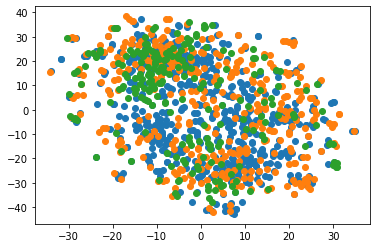

In [183]:
plt.scatter(encoded1[:, 0], encoded1[:, 1])
plt.scatter(encoded2[:, 0], encoded2[:, 1])
plt.scatter(encoded3[:, 0], encoded3[:, 1])

In [61]:
def get_most_similar(tokens):
    filtered_tokens = [token for token in tokens if token in doc2vec.wv.vocab]
    if len(filtered_tokens) > 3:
        return doc2vec.most_similar_cosmul(filtered_tokens)

In [62]:
get_most_similar([
    'канта',
    'свою',
    'квалификацию',
    'получить',
    'новые',
    'знания',
    'различной',
    'компетенции',
    'владения',
    'данными',
    'технологиями',
    'и',
    'использовали',
    'в',
    'своей',
    'работе',
])

[('с', 0.995898962020874),
 ('для', 0.9956653118133545),
 ('', 0.9954732060432434),
 ('по', 0.9954388737678528),
 ('цифровых', 0.9952661991119385),
 ('на', 0.9952549338340759),
 ('которые', 0.9951295256614685),
 ('образования', 0.995080292224884),
 ('позволит', 0.9950079321861267),
 ('узнать', 0.9949508309364319)]

In [58]:
train_df.text_tokens[0]

['не',
 'уважаемые',
 'коллеги',
 'меня',
 'зовут',
 'баранов',
 'или',
 'тщеславно',
 'я',
 'предстал',
 'ли',
 'балтийский',
 'федеральный',
 'университет',
 'имени',
 'канта',
 'свою',
 'квалификацию',
 'получить',
 'новые',
 'знания',
 'различной',
 'компетенции',
 'владения',
 'данными',
 'технологиями',
 'и',
 'использовали',
 'в',
 'своей',
 'работе',
 'ежедневно',
 'на',
 'базовом',
 'уровне',
 'точно',
 'могу',
 'сказать',
 'что',
 'владею',
 'некоторых',
 'аспектах',
 'может',
 'быть',
 'даже',
 'и',
 'более',
 'высокий',
 'уровень',
 'чем',
 'базовый',
 'дело',
 'в',
 'том',
 'что',
 'в',
 'нашем',
 'университете',
 'уже',
 'много',
 'лет',
 'одним',
 'из',
 'требований',
 'преподавателем',
 'является',
 'работа',
 'на',
 'образовательном',
 'портале',
 'ежедневно',
 'происходят',
 'на',
 'действия',
 'со',
 'студентами',
 'на',
 'этом',
 'портале',
 'я',
 'выкладываю',
 'задание',
 'проверяю',
 'задания',
 'студентов',
 'комментируя',
 'их',
 'сдаю',
 'тесты',
 'чаты',
 'фо

In [ ]:
def detect_motivation(tokens, min_window=5, max_window=30):
    max_window = min(len(tokens), max_window)
    max_score = -np.float('inf')
    max_start_index, max_end_index = None, None
    for window_size in range(min_window, max_window+1):
        for start_token_index in range(0, len(tokens) - window_size):
            end_token_index = start_token_index + window_size
            current_tokens = tokens[start_token_index: end_token_index]
            vector = torch.FloatTensor([embedder.get(word) for word in current_tokens if word in embedder]).mean(axis=0, keepdims=True)
            score = classifier.forward(vector).item()
            if score > max_score:
                max_score = score
                max_start_index = start_token_index
                max_end_index = end_token_index
    return tokens[max_start_index: max_end_index], score